In [1]:
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz, bessel
import matplotlib.pyplot as plt

In [2]:
def butter_lowpass(cutoff, fs, order=3):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=3):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=3):
    return butter(order, cutoff, fs=fs, btype='high', analog=False)

def butter_highpass_filter(data, cutoff, fs, order=3):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bessel_lowpass(cutoff, fs, norm, order=3):
    return bessel(order, cutoff, fs=fs, btype='low', analog=False,norm=norm)

def bessel_lowpass_filter(data, cutoff, fs, norm, order=3):
    b, a = bessel_lowpass(cutoff, fs, order, norm)
    y = lfilter(b, a, data)
    return y

def bessel_lowpass(cutoff, fs, norm, order=3):
    return bessel(order, cutoff, fs=fs, btype='low', analog=False,norm=norm)

def bessel_lowpass_filter(data, cutoff, fs, norm, order=3):
    b, a = bessel_lowpass(cutoff, fs, order, norm)
    y = lfilter(b, a, data)
    return y

In [12]:
import xeofs

In [9]:
# Filter requirements.
order = 1
fs = 1.0       # sample rate, Hz
cutoff = 1/24  # desired cutoff frequency of the filter, Hz

In [10]:
# Get the filter coefficients so we can check its frequency response.
bl, al = butter_lowpass(cutoff, fs, order=1)
wl, hl = freqz(bl, al, fs=fs, worN=8000)

bh, ah = butter_highpass(cutoff, fs, order=1)
wh, hh = freqz(bh, ah, fs=fs, worN=8000)

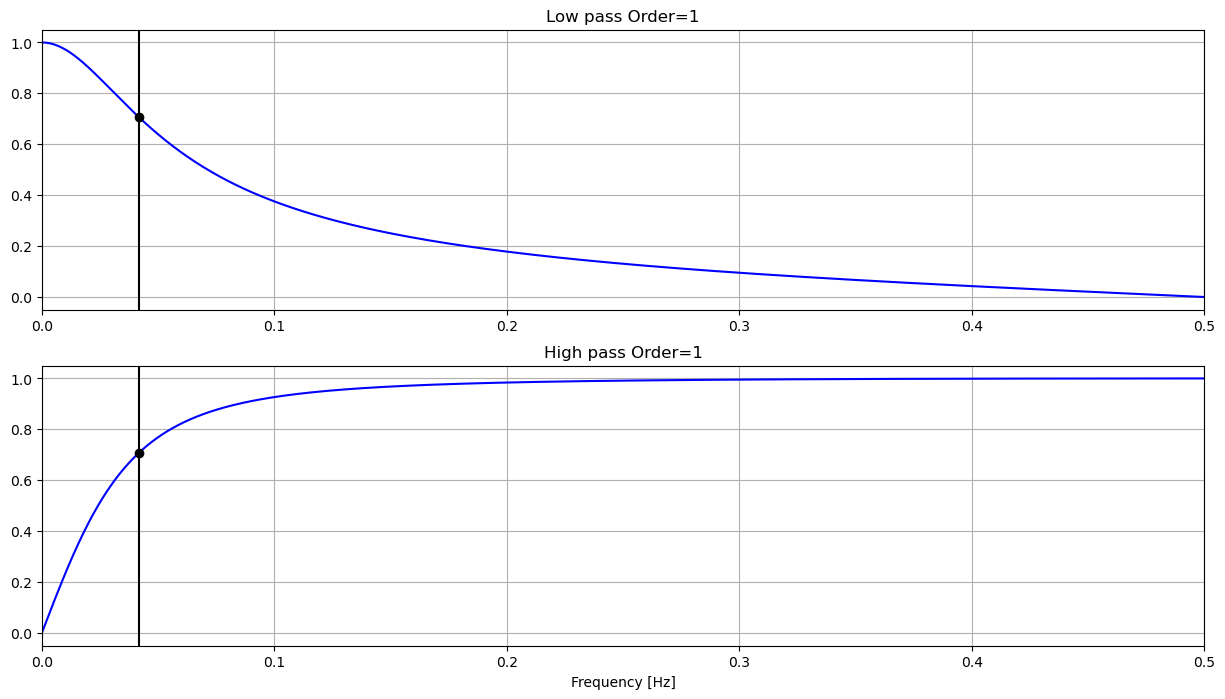

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(2, 1, 1)
plt.plot(wl, np.abs(hl), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Low pass Order={}".format(1))
plt.grid()



plt.subplot(2, 1, 2)
plt.plot(wh, np.abs(hh), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("High pass Order={}".format(1))
plt.xlabel('Frequency [Hz]')
plt.grid()

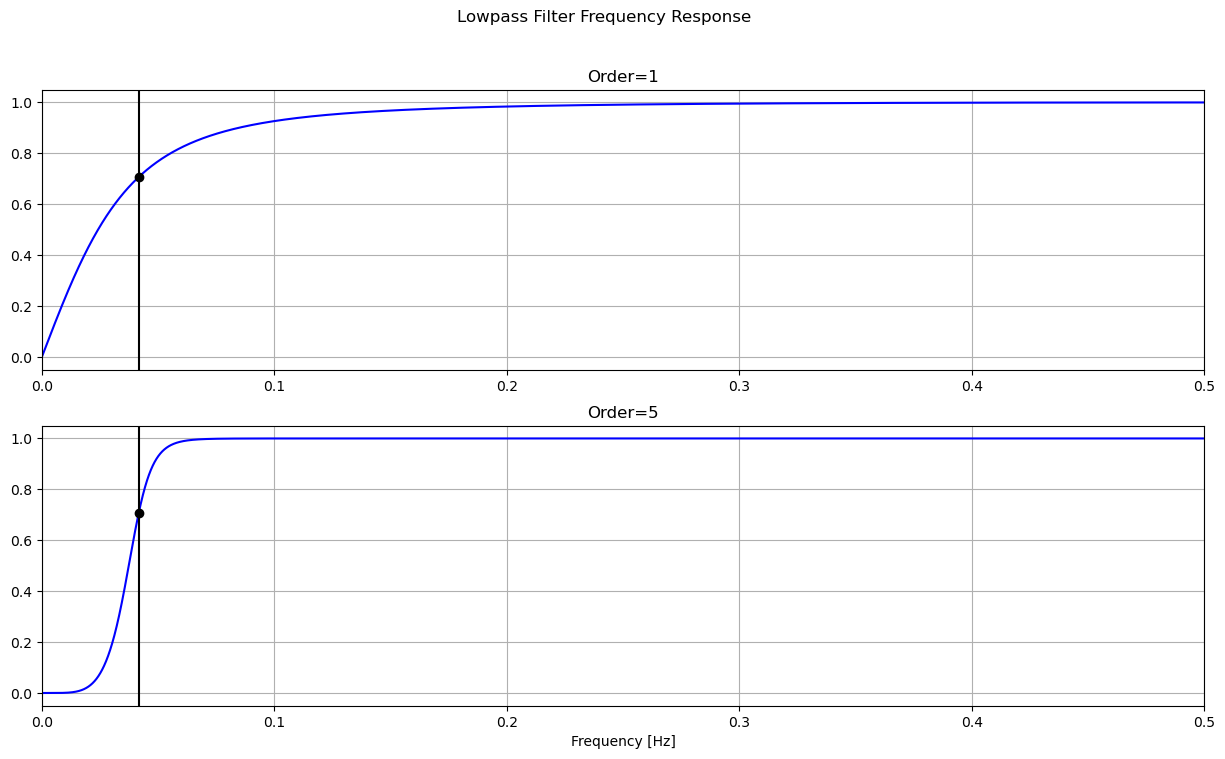

In [76]:
# Plot the frequency response.
w, h = freqz(b, a, fs=fs, worN=8000)

plt.figure(figsize=(15,8))
plt.suptitle("Lowpass Filter Frequency Response")
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Order={}".format(1))
plt.grid()



plt.subplot(2, 1, 2)
plt.plot(w2, np.abs(h2), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Order={}".format(5))
plt.xlabel('Frequency [Hz]')
plt.grid()

In [13]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

In [14]:
# Filter the data
y = butter_lowpass_filter(data, cutoff, fs, order)

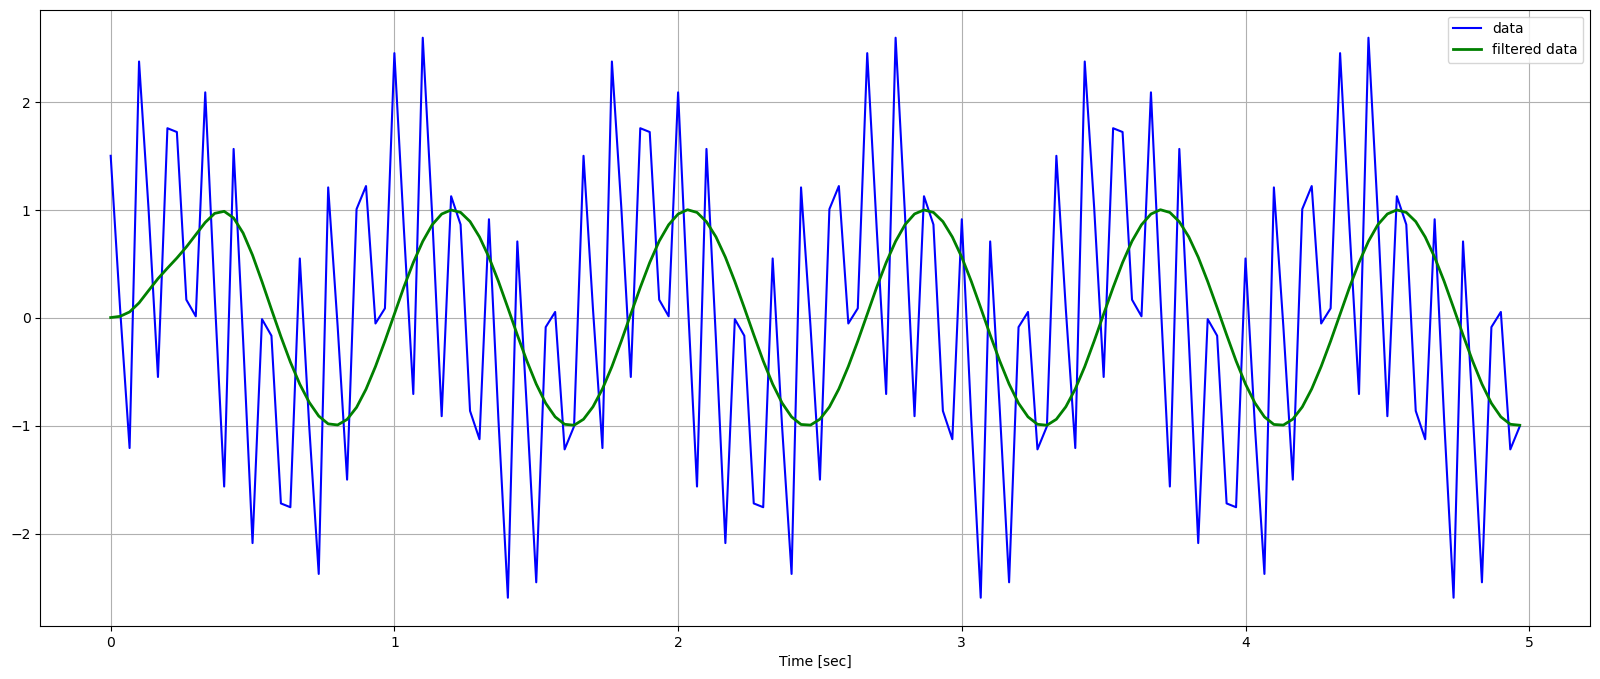

In [15]:
# Plot both the original and filtered signals.
plt.figure(figsize=(20,8))
# plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

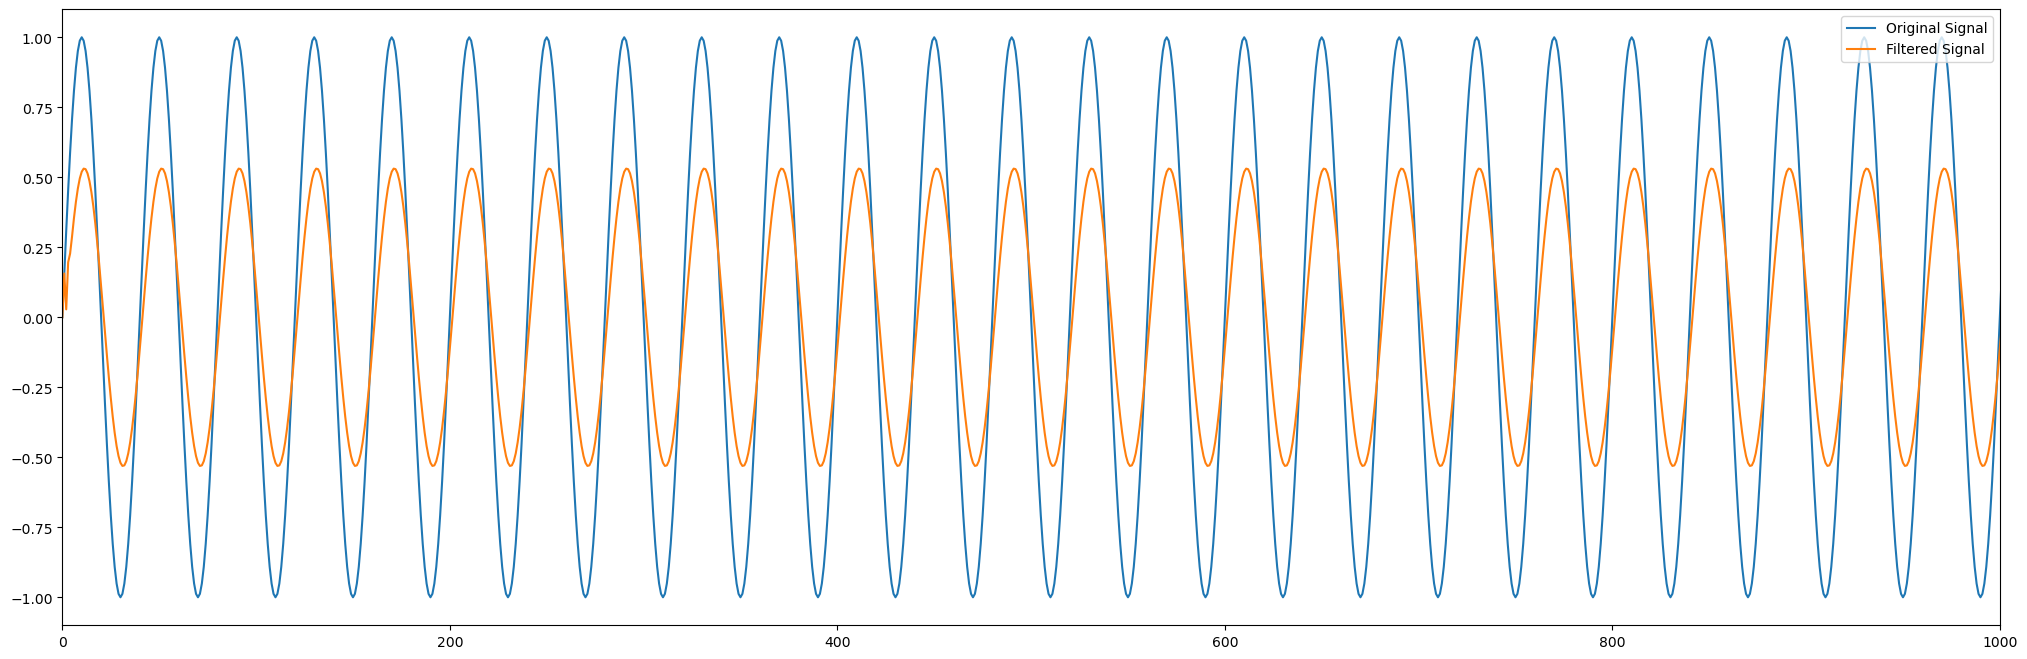

In [106]:
# Low pass shelf filter using cheby1

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, lfilter

# Define the parameters of the filter
sample_rate = 40000
cutoff_frequency = 10000
ripple = 1

# Calculate the filter order and filter coefficients
filter_order, filter_coefficients = cheby1(N=5, rp=ripple, Wn=cutoff_frequency/sample_rate, btype='highpass', output='ba')

# Load a test signal
test_signal = np.sin(2 * np.pi * 1000 * np.arange(100000) / sample_rate)

# Apply the low-pass shelving filter to the test signal
filtered_signal = lfilter(b=filter_coefficients, a=1, x=test_signal)

# Plot the original and filtered signals
plt.figure(figsize=(25,8))
plt.plot(test_signal, label='Original Signal')
plt.plot(filtered_signal, label='Filtered Signal')
plt.xlim([0,1000])
plt.legend()
plt.show()